<IPython.core.display.Javascript object>


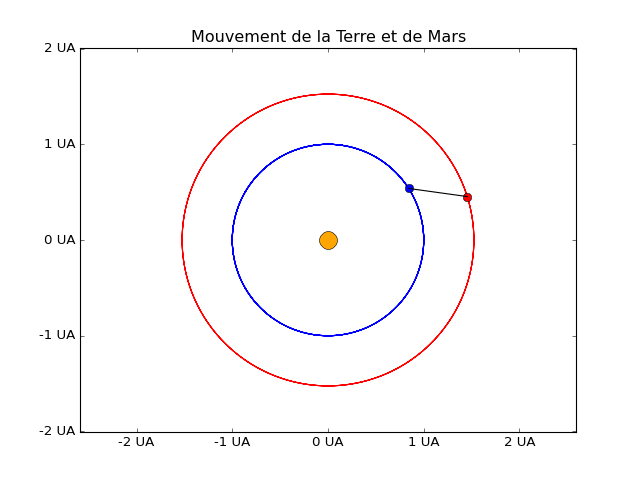

KeyboardInterrupt: 

In [5]:
#Animation Terre-Mars
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division 
from scipy import *                  
from pylab import * 
import os

UA=149597870700
jour=3600*24
annee=365*3600*24
tau=2*np.pi

Rterre=1*UA
Rmars=1.52366231*UA
Rsoleil=696342000

Tterre=1*annee
Tmars=1.8808*annee
Tsoleil=27.28*jour

#Durée de la simulation
TT=3*Tmars
#Pas de temps de la simulation
pas=1*jour

#angle continu
def theta(T):
    return (tau*np.linspace(0, TT, TT/pas)/T)%tau

#Orbites des planètes
#Terre
xt=Rterre*np.cos(theta(Tterre))
yt=Rterre*np.sin(theta(Tterre))
#Mars
xma=Rmars*np.cos(theta(Tmars))
yma=Rmars*np.sin(theta(Tmars))

D=np.sqrt((xma-xt)**2+(yma-yt)**2)
 
# Construction d'une série d'images et de leur assemblage dans une animation 
for k in range(int(TT/jour)): 
    #Orbite de la Terre
    plt.plot(xt,yt,color='blue',linewidth=1,linestyle='-')
    #Orbite de Mars
    plt.plot(xma,yma,color='red',linewidth=1,linestyle='-')
    #Soleil
    plt.plot(0,0,'o',color='orange',markersize=16, label='Soleil')
    #Positions de la Terre
    plt.plot(xt[k], yt[k], 'o', color='blue',markersize=8, label='Terre')
    #Positions de Mars
    plt.plot(xma[k], yma[k], 'o', color='red',markersize=8, label='Mars')
    #droite Terre-Mars
    plt.plot([xt[k], xma[k]], [yt[k], yma[k]], color='black',linewidth=1,linestyle='-')
    plt.axis('equal')
    xticks([n*UA for n in range(-2,3)],[str(n)+' UA' for n in range(-2,3)])
    yticks([n*UA for n in range(-2,3)],[str(n)+' UA' for n in range(-2,3)])
    plt.title('Mouvement de la Terre et de Mars')
    legend(loc='upper left')
    savefig('fichierTemp'+str('%02d' %k)+'.pdf')
    clf()
   


<IPython.core.display.Javascript object>


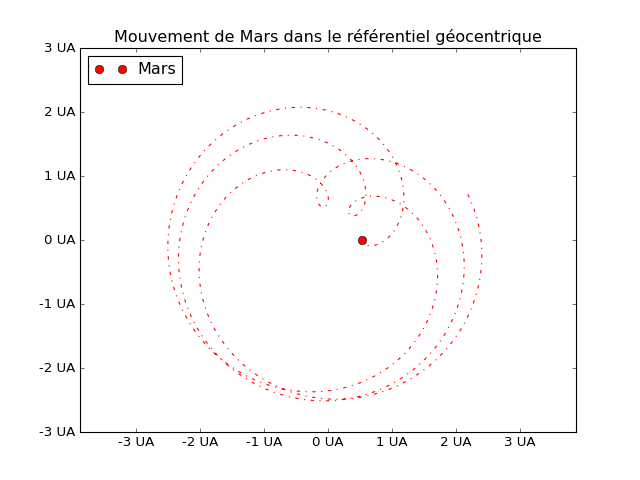

KeyboardInterrupt: 

In [2]:
#Mouvement de Mars dans le référentiel géocentrique
from __future__ import division 
from scipy import *                  
from pylab import * 
import os
%matplotlib notebook

for k in range(int(TT/jour)): 
    #Position de Mars dans le référentiel géocentrique
    plt.plot(xma-xt,yma-yt,color='red',linewidth=1,linestyle='-.')
    plt.plot(xma[k]-xt[k],yma[k]-yt[k], 'o', color='red', markersize=8, label='Mars')
    plt.axis('equal')
    xticks([n*UA for n in range(-3,4)],[str(n)+' UA' for n in range(-3,4)])
    yticks([n*UA for n in range(-3,4)],[str(n)+' UA' for n in range(-3,4)])
    plt.title('Mouvement de Mars dans le référentiel géocentrique')
    legend(loc='upper left')
    savefig('fichierTemp'+str('%02d' %k)+'.pdf')
    clf()


<IPython.core.display.Javascript object>


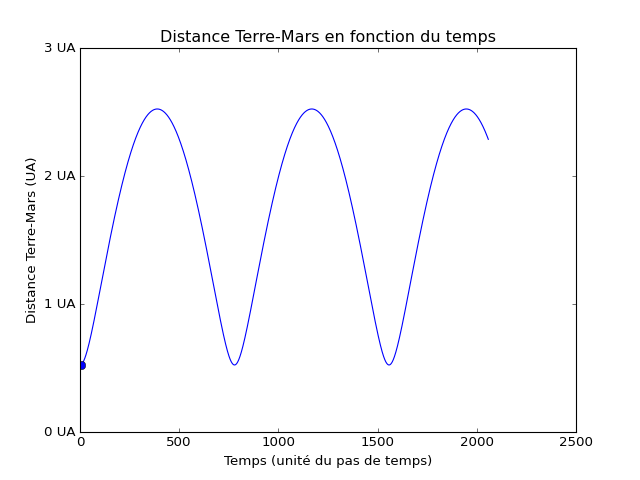

KeyboardInterrupt: 

In [3]:
#Distance Terre-Mars
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division 
from scipy import *                  
from pylab import * 
import os
#Distance Terre-Mars
D=np.sqrt((xma-xt)**2+(yma-yt)**2)

#Animation
for k in range(int(TT/pas)):
    plt.plot(D, '-', color='blue')
    plt.plot(k, D[k], 'o', color='blue', markersize=8)
    yticks([n*UA for n in range(4)],[str(n)+' UA' for n in range(4)])
    plt.xlabel('Temps (unité du pas de temps)')
    plt.ylabel('Distance Terre-Mars (UA)')
    plt.title('Distance Terre-Mars en fonction du temps')
    savefig('fichierTemp'+str('%02d' %k)+'.pdf')
    clf()

    

<IPython.core.display.Javascript object>


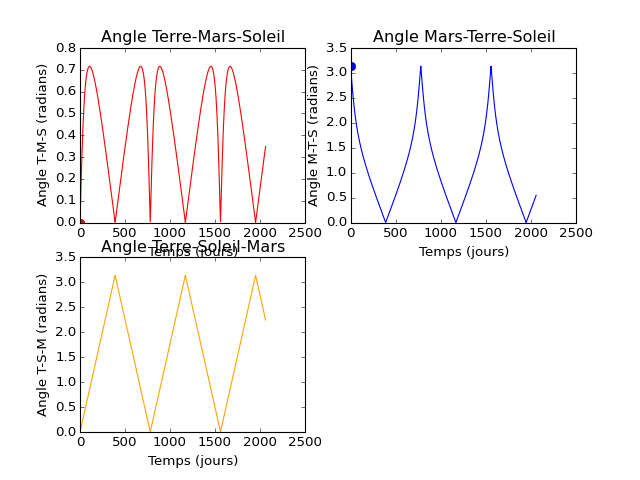

In [6]:
#Angles Terre-Mars-Soleil
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division 
from scipy import *                  
from pylab import * 
import os

#Angle Terre-Mars-Soleil
angleTMS=[np.arccos(c) for c in (Rmars**2+D**2-Rterre**2)/(2*D*Rmars)]

#Angle Mars-Terre-Soleil
angleMTS=[np.arccos(c) for c in (Rterre**2+D**2-Rmars**2)/(2*D*Rterre)]

#Angle Terre-Soleil-Mars
angleTSM=[np.arccos(c) for c in ((Rterre**2+Rmars**2-D**2)/(2*Rterre*Rmars))]

#Animation
for k in range(int(TT/pas)):
    subplot(221)
    #Angle Terre-Mars-Soleil
    plt.plot(angleTMS,'-',color='red')
    plt.plot(k, angleTMS[k], 'o', color='red', markersize=8)
    plt.xlabel('Temps (jours)')
    plt.ylabel('Angle T-M-S (radians)')
    plt.title('Angle Terre-Mars-Soleil')
    subplot(222)
    #Angle Mars-Terre-Soleil
    plt.plot(angleMTS,'-',color='blue')
    plt.plot(k, angleMTS[k], 'o', color='blue', markersize=8)
    plt.xlabel('Temps (jours)')
    plt.ylabel('Angle M-T-S (radians)')
    plt.title('Angle Mars-Terre-Soleil')
    subplot(223)
    #Angle Terre-Soleil-Mars
    plt.plot(angleTSM,'-',color='orange')
    plt.plot(k, angleTSM[k], 'o', color='orange', markersize=8)
    plt.xlabel('Temps (jours)')
    plt.ylabel('Angle T-S-M (radians)')
    plt.title('Angle Terre-Soleil-Mars')
    savefig('fichierTemp'+str('%02d' %k)+'.pdf')
    clf()


<IPython.core.display.Javascript object>


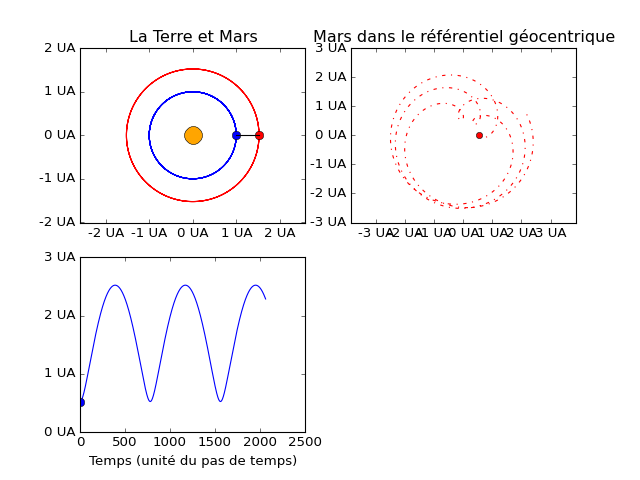

KeyboardInterrupt: 

In [5]:
# Mouvement de Mars, distance Terre-Mars et angle Terre-Mars-Soleil en parallèle
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division 
from scipy import *                  
from pylab import * 
import os


for k in range(int(TT/jour)): 
    subplot(221)
    #Orbite de la Terre
    plt.plot(xt,yt,color='blue',linewidth=1,linestyle='-')
    #Orbite de Mars
    plt.plot(xma,yma,color='red',linewidth=1,linestyle='-')
    #Soleil
    plt.plot(0,0,'o',color='orange',markersize=16)
    #Positions de la Terre
    plt.plot(xt[k], yt[k], 'o', color='blue',markersize=8)
    #Positions de Mars
    plt.plot(xma[k], yma[k], 'o', color='red',markersize=8)
    #droite Terre-Mars
    plt.plot([xt[k], xma[k]], [yt[k], yma[k]], color='black',linewidth=1,linestyle='-')
    plt.axis('equal')
    xticks([n*UA for n in range(-2,3)],[str(n)+' UA' for n in range(-2,3)])
    yticks([n*UA for n in range(-2,3)],[str(n)+' UA' for n in range(-2,3)])
    plt.title('La Terre et Mars')
    subplot(222)
    #Mouvement de Mars dans le référentiel géocentrique
    plt.plot(xma-xt,yma-yt,color='red',linewidth=1,linestyle='-.')
    plt.plot(xma[k]-xt[k],yma[k]-yt[k], 'o', color='red')
    plt.axis('equal')
    xticks([n*UA for n in range(-3,4)],[str(n)+' UA' for n in range(-3,4)])
    yticks([n*UA for n in range(-3,4)],[str(n)+' UA' for n in range(-3,4)])
    plt.title('Mars dans le référentiel géocentrique')
    subplot(223)
    #Distance Terre-Mars
    plt.plot(D, '-', color='blue')
    plt.plot(k, D[k], 'o', color='blue', markersize=8)
    plt.xlabel('Temps (unité du pas de temps)')
    plt.ylabel('Distance Terre-Mars (UA)')
    yticks([n*UA for n in range(4)],[str(n)+' UA' for n in range(4)])
    plt.title('Distance Terre-Mars')
    subplot(224)
    #Angle Terre-Soleil-Mars
    plt.plot(angleTSM,'-',color='orange')
    plt.plot(k, angleTSM[k], 'o', color='orange', markersize=8)
    plt.xlabel('Temps (jours)')
    plt.ylabel('Angle Terre-Soleil-Mars (radians)')
    plt.title('Angle Terre-Soleil-Mars')
    savefig('fichierTemp'+str('%02d' %k)+'.pdf')
    clf()
   


<IPython.core.display.Javascript object>


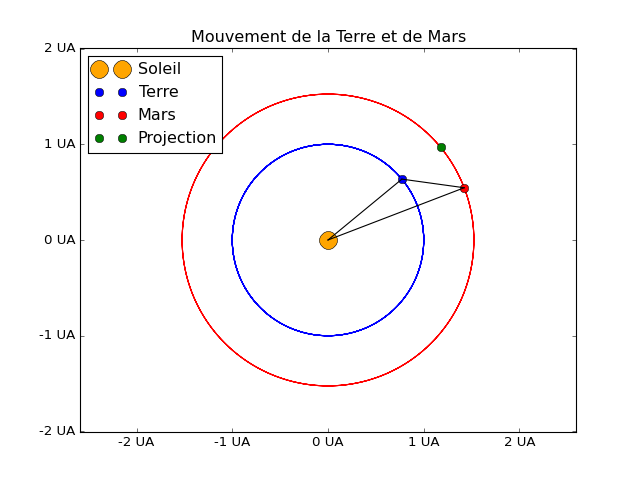

KeyboardInterrupt: 

In [7]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division 
from scipy import *                  
from pylab import * 
import os

#Distance Terre-Mars
D=np.sqrt((xma-xt)**2+(yma-yt)**2)

#Projection de la Terre sur l'orbite de Mars
xproj=Rmars*np.cos(theta(Tterre))
yproj=Rmars*np.sin(theta(Tterre))


# Construction d'une série d'images et de leur assemblage dans une animation 
for k in range(0,int(TT/jour),10): 
    #Orbite de la Terre
    plt.plot(xt,yt,color='blue',linewidth=1,linestyle='-')
    #Orbite de Mars
    plt.plot(xma,yma,color='red',linewidth=1,linestyle='-')
    #Soleil
    plt.plot(0,0,'o',color='orange',markersize=16, label='Soleil')
    #Positions de la Terre
    plt.plot(xt[k], yt[k], 'o', color='blue',markersize=8, label='Terre')
    #Positions de Mars
    plt.plot(xma[k], yma[k], 'o', color='red',markersize=8, label='Mars')
    #Projection de la Terre
    plt.plot(xproj[k],yproj[k], 'o', color='green',markersize=8, label='Projection')
    #droite Terre-Mars
    plt.plot([xt[k], xma[k]], [yt[k], yma[k]], color='black',linewidth=1,linestyle='-')
    #droite Terre-Soleil
    plt.plot([xt[k], 0], [yt[k], 0], color='black',linewidth=1,linestyle='-')
    #droite Soleil-Mars
    plt.plot([0, xma[k]], [0, yma[k]], color='black',linewidth=1,linestyle='-')
    legend(loc='upper left')
    plt.axis('equal')
    xticks([n*UA for n in range(-2,3)],[str(n)+' UA' for n in range(-2,3)])
    yticks([n*UA for n in range(-2,3)],[str(n)+' UA' for n in range(-2,3)])
    plt.title('Mouvement de la Terre et de Mars')
    savefig('fichierTemp'+str('%02d' %k)+'.pdf')
    clf()

<IPython.core.display.Javascript object>


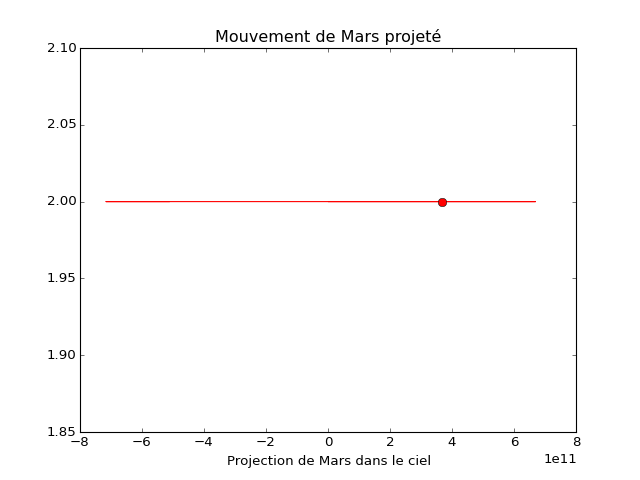

KeyboardInterrupt: 

In [9]:
from __future__ import division 
from scipy import *                  
from pylab import * 
import os
%matplotlib notebook

#Projection de la Terre sur l'orbite de Mars
xproj=Rmars*np.cos(theta(Tterre))
yproj=Rmars*np.sin(theta(Tterre))

#Arc de cercle séparant Mars de la projection de la Terre sur son orbite
def longueur_arc():
    A=[]
    for k in range(len(angleTSM)):
        if theta(Tterre)[k]>=theta(Tmars)[k]:
            A.append(Rmars*angleTSM[k])
        else:
            A.append(-Rmars*angleTSM[k])
    return A
arc=longueur_arc()

#dates de début et de fin de la simulation
debut=0
fin=len(arc)

# Construction d'une série d'images et de leur assemblage dans une animation 
for k in range(debut,fin,20): 
    #Longueur de l'arc de cercle entre Mars de la projection de la Terre sur son orbite
    plt.plot(arc[debut:fin],[2 for i in range(debut,fin)],color='red')
    plt.plot(arc[k],2, 'o', color='red', markersize=8)
    plt.title('Mouvement de Mars projeté')
    plt.xlabel('Projection de Mars dans le ciel')
    savefig('fichierTemp'+str('%02d' %k)+'.pdf')
    clf()

<IPython.core.display.Javascript object>


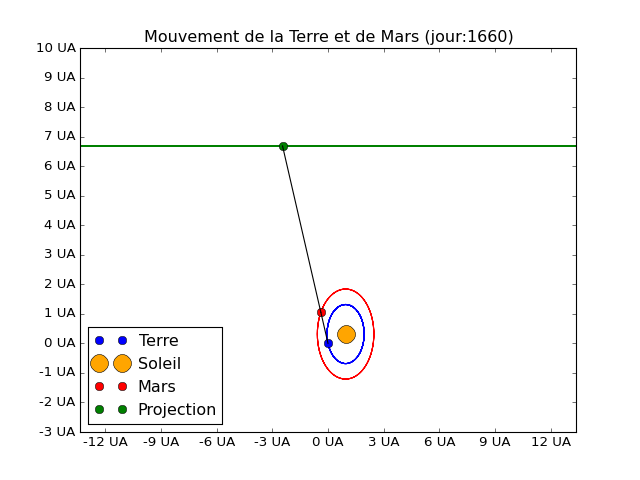

KeyboardInterrupt: 

In [4]:
from __future__ import division 
from scipy import *                  
from pylab import * 
import os
%matplotlib notebook

#dates de début et de fin de la simulation
debut=1500
fin=len(yt)


#Projection de Mars dans le ciel en fonction du temps (référentiel géocentrique)
for k in range(debut,fin,10): 
    #Orbite de la Terre
    plt.plot(xt-xt[k],yt-yt[k],color='blue',linewidth=1,linestyle='-')
    #Orbite de Mars
    plt.plot(xma-xt[k],yma-yt[k],color='red',linewidth=1,linestyle='-')
    #Terre
    plt.plot(0,0,'o',color='blue',markersize=8, label='Terre')
    #Positions du Soleil
    plt.plot(-xt[k], -yt[k], 'o', color='orange',markersize=16, label='Soleil')
    #Positions de Mars
    plt.plot(xma[k]-xt[k], yma[k]-yt[k], 'o', color='red',markersize=8, label='Mars')
    #droite Terre-Mars
    plt.plot([0, xma[k]-xt[k]], [0, yma[k]-yt[k]], color='black',linewidth=1,linestyle='-')
    #coefficient directeur de la droite Terre-Mars
    a=(yma-yt[k])/(xma-xt[k])
    #Projection dans le ciel: 
    #ordonnée
    yp=[1e12 for k in range(len(yt))]
    #abscisse
    xp=yp/a
    #Projection de Mars dans le ciel
    plt.plot(xp,yp,color='green')
    plt.plot(xp[k], yp[k], 'o', color='green', markersize=8, label='Projection')
    #droite Mars-Projection
    plt.plot([xma[k]-xt[k], xp[k]], [yma[k]-yt[k], yp[k]], color='black',linewidth=1,linestyle='-')
    legend(loc='lower left')
    plt.xlim(-2e12,2e12)
    plt.ylim(-3e11,1.2e12)
    xticks([3*n*UA for n in range(-4,5)],[str(3*n)+' UA' for n in range(-4,5)])
    yticks([n*UA for n in range(-3,11)],[str(n)+' UA' for n in range(-3,11)])
    plt.title('Mouvement de la Terre et de Mars (jour:'+str(k)+')')
    savefig('fichierTemp'+str('%02d' %k)+'.pdf')
    clf()

In [55]:
def mvt_retro():
    L=[]
    for k in range(2,len(yt)):
        #coefficient directeur de la droite Terre-Mars
        a=(yma-yt[k])/(xma-xt[k])
        #Projection dans le ciel: 
        #ordonnée
        yp=[1e12 for k in range(len(yt))]
        #abscisse
        xp=yp/a
        if xp[k]>xp[k-1]:
            L.append(k)
    return L
mvt_retro()

[75, 355, 1065, 1321, 1773]